# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.ncei.noaa.gov/cdo-web/datasets/GHCND/locations/ZIP:64116/detail

Import the necessary libraries and create your dataframe(s).

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import style

# read in .csv file as dataframe (from checkpoint 2)
weather_df = pd.read_csv('WeatherData.csv')
# remove duplicated index column
weather_df = weather_df.drop(['Unnamed: 0'],axis=1)
# view sample
weather_df.head(25)

,STATION,NAME,DATE,Avg Daily Cloudiness (%),Avg Solar Day Cloudiness (%),Avg Daily Wind Speed (mph),Days in Multiday Precipitation,Fastest Wind Time (HH:MM),Base of Frozen Ground Layer (inches),Top of Frozen Ground Layer (inches),...,Weather Type - Freezing Drizzle,Weather Type - Rain,Weather Type - Freezing Rain,Weather Type - Snow,Weather Type - Ice Fog or Freezing Fog,Year,Month,Day,Month & Day,Year & Month
0,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1934,1,1,01-01,1934-01
1,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1934,1,2,01-02,1934-01
2,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1934,1,3,01-03,1934-01
3,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1934,1,4,01-04,1934-01
4,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1934,1,5,01-05,1934-01
5,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1934,1,6,01-06,1934-01
6,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1934,1,7,01-07,1934-01
7,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1934,1,8,01-08,1934-01
8,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,1934,1,9,01-09,1934-01
9,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1934,1,10,01-10,1934-01


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [2]:
# Get info about dataframe
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32138 entries, 0 to 32137
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   STATION                                           32138 non-null  object 
 1   NAME                                              32138 non-null  object 
 2   DATE                                              32138 non-null  object 
 3   Avg Daily Cloudiness (%)                          3886 non-null   float64
 4   Avg Solar Day Cloudiness (%)                      3886 non-null   float64
 5   Avg Daily Wind Speed (mph)                        10904 non-null  float64
 6   Days in Multiday Precipitation                    11 non-null     float64
 7   Fastest Wind Time (HH:MM)                         3875 non-null   float64
 8   Base of Frozen Ground Layer (inches)              5 non-null      float64
 9   Top of Frozen Gro

In [3]:
# Check for duplicate dates. I will be eliminating the NKC station so will compare the total downtown station records against unique dates for those records.
print('{0} records\n{1} dates'.format(len(weather_df[weather_df['STATION']=='USW00013988']),len(weather_df[weather_df['STATION']=='USW00013988']['DATE'].unique())))

29970 records
29970 dates


In [4]:
# Check for number of records missing any of the key three data points (lowest temp, highest temp, precipitation)
weather_df_downtown = weather_df[weather_df['STATION']=='USW00013988']
Missing_Data = weather_df_downtown[(weather_df_downtown['Lowest Hourly Temp (Fahrenheit)'].isna()) | (weather_df_downtown['Highest Hourly Temp (Fahrenheit)'].isna()) | (weather_df_downtown['Precipitation (inches)'].isna())]
len(Missing_Data)

101

In [5]:
# Remove records that are missing all three key data points
# records_to_remove = Missing_Data[(Missing_Data['Lowest Hourly Temp (Fahrenheit)'].isna()) & (Missing_Data['Highest Hourly Temp (Fahrenheit)'].isna()) & (Missing_Data['Precipitation (inches)'].isna())].index
# weather_df.drop(records_to_remove,inplace=True)
# Missing_Data.drop(records_to_remove,inplace=True)
# print('{0} total records\n{1} records missing data'.format(len(weather_df[weather_df['STATION']=='USW00013988']),len(Missing_Data)))
# records_to_remove

In [6]:
# Review remaining missing data starting with precipitation
# Find dates of records missing the precipitation data point
Dates_missing_precipitation = Missing_Data[Missing_Data['Precipitation (inches)'].isna()]['DATE'].values
Dates_missing_precipitation


array(['1981-05-22', '1985-05-26', '1985-05-27', '1988-09-23',
       '1988-09-24', '1988-09-28', '1988-09-29', '1988-09-30',
       '1995-01-01', '1995-01-02', '1995-01-03', '1995-01-04',
       '1995-01-07', '1995-01-08', '1995-01-09', '1995-01-10',
       '1995-01-11', '1995-01-12', '1995-01-13', '1995-01-14',
       '1995-01-15', '1995-01-20', '1995-01-21', '1995-01-22',
       '1995-01-23', '1995-01-24', '1995-01-25', '1995-01-29',
       '1995-01-30', '1995-01-31', '1996-01-03', '1996-07-14',
       '1996-07-15', '1998-03-08', '2005-01-10', '2012-02-28',
       '2015-04-26', '2016-12-16', '2018-08-14', '2018-08-15',
       '2018-08-16', '2018-08-28', '2018-09-28', '2018-10-12',
       '2018-11-08', '2019-03-03', '2019-03-12', '2020-01-22',
       '2020-02-12', '2020-04-24', '2020-04-25', '2020-09-05',
       '2021-01-15', '2021-04-08', '2021-04-28', '2021-10-12',
       '2021-10-13', '2022-01-15', '2022-07-26', '2022-07-27',
       '2022-08-16', '2023-04-10'], dtype=object)

In [7]:
# Display records for both stations on records missing precipation data
Records_missing_precipitation = weather_df[weather_df['DATE'].isin(Dates_missing_precipitation)]
Precipitation_Duplicated_Dates = Records_missing_precipitation[Records_missing_precipitation['DATE'].duplicated()]['DATE'].values
weather_df[weather_df['DATE'].isin(Precipitation_Duplicated_Dates)][{'STATION','Precipitation (inches)','DATE'}]

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1873684866.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  weather_df[weather_df['DATE'].isin(Precipitation_Duplicated_Dates)][{'STATION','Precipitation (inches)','DATE'}]


,STATION,Precipitation (inches),DATE
27022,USW00013988,NaN,2015-04-26
27622,USW00013988,NaN,2016-12-16
31138,US1MOCY0003,0.35,2015-04-26
31699,US1MOCY0003,0.00,2016-12-16


In [8]:
# Sub NKC station precipitation data for missing Downtown precipitation data
weather_df['Precipitation (inches)'][27022] = weather_df['Precipitation (inches)'][31138]
weather_df['Precipitation (inches)'][27622] = weather_df['Precipitation (inches)'][31699]
# Ensure temperature data is not also missing for these records
weather_df[weather_df['DATE'].isin(Precipitation_Duplicated_Dates)][{'STATION','Precipitation (inches)','DATE','Lowest Hourly Temp (Fahrenheit)','Highest Hourly Temp (Fahrenheit)'}]

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1001771695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Precipitation (inches)'][27022] = weather_df['Precipitation (inches)'][31138]
/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1001771695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Precipitation (inches)'][27622] = weather_df['Precipitation (inches)'][31699]
/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1001771695.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list inst

,STATION,DATE,Highest Hourly Temp (Fahrenheit),Precipitation (inches),Lowest Hourly Temp (Fahrenheit)
27022,USW00013988,2015-04-26,64.0,0.35,49.0
27622,USW00013988,2016-12-16,33.0,0.00,27.0
31138,US1MOCY0003,2015-04-26,NaN,0.35,NaN
31699,US1MOCY0003,2016-12-16,NaN,0.00,NaN


In [9]:
# Remove records from missing data list now that they have been resolved.
Missing_Data.drop(index={27022,27622},axis=0,inplace=True)
len(Missing_Data)


/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/40950122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Missing_Data.drop(index={27022,27622},axis=0,inplace=True)


99

In [10]:
# Isolate relevant columns for remaining missing data to determine if there are clues to fill in data.

Missing_Data_Limit = Missing_Data.loc[:,('NAME','DATE','Days in Multiday Precipitation','Multiday Precipitation Total (inches)','Precipitation (inches)','Snowfall (inches)','Avg Hourly Temp (Fahrenheit)','Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)','Temperature at Observation (Fahrenheit)','Water Equivalent of Snow on the Ground (inches)','Water-equivalent of Snowfall (inches)','Weather Type - Ice Pellets','Weather Type - Hail','Weather Type - Drizzle','Weather Type - Freezing Drizzle','Weather Type - Rain','Weather Type - Freezing Rain','Weather Type - Snow')]
Missing_Data_Limit

,NAME,DATE,Days in Multiday Precipitation,Multiday Precipitation Total (inches),Precipitation (inches),Snowfall (inches),Avg Hourly Temp (Fahrenheit),Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit),Temperature at Observation (Fahrenheit),Water Equivalent of Snow on the Ground (inches),Water-equivalent of Snowfall (inches),Weather Type - Ice Pellets,Weather Type - Hail,Weather Type - Drizzle,Weather Type - Freezing Drizzle,Weather Type - Rain,Weather Type - Freezing Rain,Weather Type - Snow
15056,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1981-05-22,NaN,NaN,NaN,0.0,NaN,85.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
15795,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1983-05-31,NaN,NaN,0.0,0.0,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16521,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1985-05-26,NaN,NaN,NaN,0.0,NaN,93.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
16522,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1985-05-27,NaN,NaN,NaN,0.0,NaN,72.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
17737,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1988-09-23,NaN,NaN,NaN,0.0,NaN,69.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29478,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2022-01-15,NaN,NaN,NaN,NaN,NaN,33.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29670,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2022-07-26,NaN,NaN,NaN,NaN,NaN,79.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29671,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2022-07-27,NaN,NaN,NaN,NaN,NaN,87.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29691,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2022-08-16,NaN,NaN,NaN,NaN,NaN,72.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Review values present for each column
Missing_Data_Limit.columns
for i in Missing_Data_Limit.columns:
    print(Missing_Data_Limit[i].value_counts())
    print('\n')


KANSAS CITY DOWNTOWN AIRPORT, MO US    99
Name: NAME, dtype: int64


1981-05-22    1
2017-07-28    1
2017-06-08    1
2017-05-01    1
2017-04-30    1
             ..
1995-01-25    1
1995-01-24    1
1995-01-23    1
1995-01-22    1
2023-04-10    1
Name: DATE, Length: 99, dtype: int64


2.0    1
Name: Days in Multiday Precipitation, dtype: int64


0.2    1
Name: Multiday Precipitation Total (inches), dtype: int64


0.00    34
0.20     1
0.15     1
1.50     1
0.12     1
1.87     1
Name: Precipitation (inches), dtype: int64


0.0    32
0.1     1
2.5     1
Name: Snowfall (inches), dtype: int64


0.0    2
Name: Avg Hourly Temp (Fahrenheit), dtype: int64


36.0    5
37.0    5
49.0    3
42.0    3
33.0    2
92.0    2
86.0    2
26.0    2
32.0    2
23.0    2
67.0    2
70.0    2
79.0    2
75.0    2
72.0    2
64.0    1
38.0    1
96.0    1
55.0    1
85.0    1
68.0    1
91.0    1
53.0    1
78.0    1
87.0    1
89.0    1
58.0    1
84.0    1
62.0    1
61.0    1
81.0    1
28.0    1
93.0    1
41.0    1
43.0

In [12]:
# Are there any records where precipitation is null and Weather Type - Rain is 0?  If so, we will fill in precipitation as 0.
Missing_Data[(Missing_Data['Precipitation (inches)'].isna()) & (Missing_Data['Weather Type - Rain']==0)]

,STATION,NAME,DATE,Avg Daily Cloudiness (%),Avg Solar Day Cloudiness (%),Avg Daily Wind Speed (mph),Days in Multiday Precipitation,Fastest Wind Time (HH:MM),Base of Frozen Ground Layer (inches),Top of Frozen Ground Layer (inches),...,Weather Type - Freezing Drizzle,Weather Type - Rain,Weather Type - Freezing Rain,Weather Type - Snow,Weather Type - Ice Fog or Freezing Fog,Year,Month,Day,Month & Day,Year & Month


In [13]:
# Does Avg Hourly Temp (Fahrenheit) or Temperature at Observation (Fahrenheit) provide any information for records missing highest and lowest temp?

Missing_Data_Limit[((Missing_Data_Limit['Highest Hourly Temp (Fahrenheit)'].isna()) | (Missing_Data['Lowest Hourly Temp (Fahrenheit)'].isna())) & ((Missing_Data_Limit['Avg Hourly Temp (Fahrenheit)'].notna()) | (Missing_Data['Temperature at Observation (Fahrenheit)'].notna()))]

,NAME,DATE,Days in Multiday Precipitation,Multiday Precipitation Total (inches),Precipitation (inches),Snowfall (inches),Avg Hourly Temp (Fahrenheit),Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit),Temperature at Observation (Fahrenheit),Water Equivalent of Snow on the Ground (inches),Water-equivalent of Snowfall (inches),Weather Type - Ice Pellets,Weather Type - Hail,Weather Type - Drizzle,Weather Type - Freezing Drizzle,Weather Type - Rain,Weather Type - Freezing Rain,Weather Type - Snow
19679,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1995-03-19,NaN,NaN,0.2,NaN,NaN,70.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20502,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1997-06-19,NaN,NaN,0.0,0.0,NaN,92.0,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23264,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2005-01-10,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23265,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2005-01-11,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# For records 19679 & 20502, was temp at observation actually the low temp?
# Check date before and after record 19679 for temp data
weather_df[(weather_df['DATE']=='1995-03-18') | (weather_df['DATE']=='1995-03-20')][{'Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)'}]

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/616806541.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  weather_df[(weather_df['DATE']=='1995-03-18') | (weather_df['DATE']=='1995-03-20')][{'Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)'}]


,Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit)
19678,76.0,52.0
19680,62.0,48.0


In [15]:
# Check date before and after record 20502 for temp data
weather_df[(weather_df['DATE']=='1997-06-18') | (weather_df['DATE']=='1997-06-20')][{'Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)'}]

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/4245900804.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  weather_df[(weather_df['DATE']=='1997-06-18') | (weather_df['DATE']=='1997-06-20')][{'Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)'}]


,Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit)
20501,90.0,69.0
20503,94.0,72.0


In [16]:
# Avg and Observation temp fields do not seem relevant to fill in missing high and low temps.  

In [17]:
# Identify the specific records that have null values for each of the three key fields

Missing_Data_Precipitation = Missing_Data[Missing_Data['Precipitation (inches)'].isna()].index
Missing_Data_LowTemp = Missing_Data[Missing_Data['Lowest Hourly Temp (Fahrenheit)'].isna()].index
Missing_Data_HighTemp = Missing_Data[Missing_Data['Highest Hourly Temp (Fahrenheit)'].isna()].index
Missing_Data_HighTemp

Int64Index([15795, 18949, 18962, 19038, 19691, 19695, 19839, 19875, 19895,
            19997, 20120, 20134, 20148, 20160, 20162, 20219, 20245, 20248,
            20250, 20283, 20319, 20322, 20328, 20329, 20602, 20609, 20623,
            23264, 23265, 25703, 25869, 27442, 27443, 27628, 27757, 27845],
           dtype='int64')

In [18]:
# Test theory that average of day before and day after is close to temp on target date

low_difference = []

for i in weather_df.index:
    if i-1 in weather_df.index and i+1 in weather_df.index and not np.isnan(weather_df.loc[i-1,'Lowest Hourly Temp (Fahrenheit)']) and not np.isnan(weather_df.loc[i,'Lowest Hourly Temp (Fahrenheit)']) and not np.isnan(weather_df.loc[i+1,'Lowest Hourly Temp (Fahrenheit)']):
        low_difference.append(weather_df['Lowest Hourly Temp (Fahrenheit)'][i] - (weather_df['Lowest Hourly Temp (Fahrenheit)'][i-1] + weather_df['Lowest Hourly Temp (Fahrenheit)'][i+1])/2)

low_deviation = sum(low_difference) / len(low_difference)

low_deviation

0.0003349073981044241

In [19]:
high_difference = []

for i in weather_df.index:
    if i-1 in weather_df.index and i+1 in weather_df.index and not np.isnan(weather_df.loc[i-1,'Highest Hourly Temp (Fahrenheit)']) and not np.isnan(weather_df.loc[i,'Highest Hourly Temp (Fahrenheit)']) and not np.isnan(weather_df.loc[i+1,'Highest Hourly Temp (Fahrenheit)']):
        high_difference.append(weather_df['Highest Hourly Temp (Fahrenheit)'][i] - (weather_df['Highest Hourly Temp (Fahrenheit)'][i-1] + weather_df['Highest Hourly Temp (Fahrenheit)'][i+1])/2)

high_deviation = sum(high_difference) / len(high_difference)

high_deviation

0.0022097227802330252

In [20]:
# Temperature data is entered to the nearest tenth of a degree. 
# Deviations are less than one hundredth of a degree. 
# Will proceed with filling in records with average of day before and after.

In [21]:
# If the missing low record has a low record before and after it, average these two temps to fill in the missing value 

# Low temperature imputation
for i in Missing_Data_LowTemp:
    if i-1 in weather_df.index and i+1 in weather_df.index and not np.isnan(weather_df.loc[i-1,'Lowest Hourly Temp (Fahrenheit)']) and not np.isnan(weather_df.loc[i+1,'Lowest Hourly Temp (Fahrenheit)']):
        weather_df['Lowest Hourly Temp (Fahrenheit)'][i] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][i-1] + weather_df['Lowest Hourly Temp (Fahrenheit)'][i+1])/2
        Missing_Data_LowTemp = Missing_Data_LowTemp.drop(i)

Missing_Data_LowTemp

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1489477954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Lowest Hourly Temp (Fahrenheit)'][i] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][i-1] + weather_df['Lowest Hourly Temp (Fahrenheit)'][i+1])/2
/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1489477954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Lowest Hourly Temp (Fahrenheit)'][i] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][i-1] + weather_df['Lowest Hourly Temp (Fahrenheit)'][i+1])/2
/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipy

Int64Index([20328, 20329, 23264, 23265, 27757, 27758], dtype='int64')

In [22]:
# High temperature imputation

for i in Missing_Data_HighTemp:
    if i-1 in weather_df.index and i+1 in weather_df.index and not np.isnan(weather_df.loc[i-1,'Highest Hourly Temp (Fahrenheit)']) and not np.isnan(weather_df.loc[i+1,'Highest Hourly Temp (Fahrenheit)']):
        weather_df['Highest Hourly Temp (Fahrenheit)'][i] = (weather_df['Highest Hourly Temp (Fahrenheit)'][i-1] + weather_df['Highest Hourly Temp (Fahrenheit)'][i+1])/2
        Missing_Data_HighTemp = Missing_Data_HighTemp.drop(i)

Missing_Data_HighTemp

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/3639290448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Highest Hourly Temp (Fahrenheit)'][i] = (weather_df['Highest Hourly Temp (Fahrenheit)'][i-1] + weather_df['Highest Hourly Temp (Fahrenheit)'][i+1])/2
/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/3639290448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Highest Hourly Temp (Fahrenheit)'][i] = (weather_df['Highest Hourly Temp (Fahrenheit)'][i-1] + weather_df['Highest Hourly Temp (Fahrenheit)'][i+1])/2
/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn

Int64Index([20328, 20329, 23264, 23265, 27442, 27443], dtype='int64')

In [23]:
# For missing precipitation values, fill in with average of precipitation on that day
for i in Missing_Data_Precipitation:
    weather_df['Precipitation (inches)'][i] = round(weather_df[weather_df['Month & Day'] == weather_df['Month & Day'][i]]['Precipitation (inches)'].mean(),2)


/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/3600688816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Precipitation (inches)'][i] = round(weather_df[weather_df['Month & Day'] == weather_df['Month & Day'][i]]['Precipitation (inches)'].mean(),2)


In [24]:
# review remaining items with missing temp data
Missing_Data = Missing_Data_LowTemp.union(Missing_Data_HighTemp)
Missing_Data_Limit.loc[Missing_Data,:]

,NAME,DATE,Days in Multiday Precipitation,Multiday Precipitation Total (inches),Precipitation (inches),Snowfall (inches),Avg Hourly Temp (Fahrenheit),Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit),Temperature at Observation (Fahrenheit),Water Equivalent of Snow on the Ground (inches),Water-equivalent of Snowfall (inches),Weather Type - Ice Pellets,Weather Type - Hail,Weather Type - Drizzle,Weather Type - Freezing Drizzle,Weather Type - Rain,Weather Type - Freezing Rain,Weather Type - Snow
20328,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1996-12-27,NaN,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20329,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1996-12-28,NaN,NaN,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23264,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2005-01-10,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23265,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2005-01-11,NaN,NaN,0.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27442,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2016-06-19,NaN,NaN,0.00,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27443,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2016-06-20,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27757,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2017-04-30,NaN,NaN,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27758,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2017-05-01,NaN,NaN,0.00,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# check temperature data surrounding records 20328 & 20329
weather_df.loc[20326:20331,{'DATE','Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)'}]

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/3223039279.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  weather_df.loc[20326:20331,{'DATE','Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)'}]


,Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit),DATE
20326,26.0,8.0,1996-12-25
20327,23.0,11.0,1996-12-26
20328,NaN,NaN,1996-12-27
20329,NaN,NaN,1996-12-28
20330,40.0,18.0,1996-12-29
20331,50.0,23.0,1996-12-30


In [26]:
# impute average of 1996-12-26 & 1996-12-29 to missing fields
weather_df['Lowest Hourly Temp (Fahrenheit)'][20328] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][20327] + weather_df['Lowest Hourly Temp (Fahrenheit)'][20330])/2
weather_df['Lowest Hourly Temp (Fahrenheit)'][20329] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][20327] + weather_df['Lowest Hourly Temp (Fahrenheit)'][20330])/2
weather_df['Highest Hourly Temp (Fahrenheit)'][20328] = (weather_df['Highest Hourly Temp (Fahrenheit)'][20327] + weather_df['Highest Hourly Temp (Fahrenheit)'][20330])/2
weather_df['Highest Hourly Temp (Fahrenheit)'][20329] = (weather_df['Highest Hourly Temp (Fahrenheit)'][20327] + weather_df['Highest Hourly Temp (Fahrenheit)'][20330])/2
Missing_Data = Missing_Data.drop([20328,20329])
Missing_Data

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/3729703290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Lowest Hourly Temp (Fahrenheit)'][20328] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][20327] + weather_df['Lowest Hourly Temp (Fahrenheit)'][20330])/2
/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/3729703290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Lowest Hourly Temp (Fahrenheit)'][20329] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][20327] + weather_df['Lowest Hourly Temp (Fahrenheit)'][20330])/2
/var/folders/n7/v6st_7m50r399qhl3pcq

Int64Index([23264, 23265, 27442, 27443, 27757, 27758], dtype='int64')

In [27]:
# check temperature data surrounding records 27442 & 27443
weather_df.loc[27440:27445,{'DATE','Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)'}]

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/3892168885.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  weather_df.loc[27440:27445,{'DATE','Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)'}]


,Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit),DATE
27440,95.0,78.0,2016-06-17
27441,91.0,74.0,2016-06-18
27442,NaN,73.0,2016-06-19
27443,NaN,74.5,2016-06-20
27444,97.0,76.0,2016-06-21
27445,101.0,82.0,2016-06-22


In [28]:
# impute average of 2016-06-18 & 2016-06-21 to missing fields

weather_df['Highest Hourly Temp (Fahrenheit)'][27442] = (weather_df['Highest Hourly Temp (Fahrenheit)'][27441] + weather_df['Highest Hourly Temp (Fahrenheit)'][27444])/2
weather_df['Highest Hourly Temp (Fahrenheit)'][27443] = (weather_df['Highest Hourly Temp (Fahrenheit)'][27441] + weather_df['Highest Hourly Temp (Fahrenheit)'][27444])/2
Missing_Data = Missing_Data.drop([27442,27443])
Missing_Data

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/2155220673.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Highest Hourly Temp (Fahrenheit)'][27442] = (weather_df['Highest Hourly Temp (Fahrenheit)'][27441] + weather_df['Highest Hourly Temp (Fahrenheit)'][27444])/2
/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/2155220673.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Highest Hourly Temp (Fahrenheit)'][27443] = (weather_df['Highest Hourly Temp (Fahrenheit)'][27441] + weather_df['Highest Hourly Temp (Fahrenheit)'][27444])/2


Int64Index([23264, 23265, 27757, 27758], dtype='int64')

In [29]:
# check temperature data surrounding records 23264 & 23265
weather_df.loc[23262:23267,{'DATE','Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)'}]

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/43699583.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  weather_df.loc[23262:23267,{'DATE','Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)'}]


,Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit),DATE
23262,31.0,19.0,2005-01-08
23263,44.0,28.0,2005-01-09
23264,NaN,NaN,2005-01-10
23265,NaN,NaN,2005-01-11
23266,36.0,30.0,2005-01-12
23267,30.0,9.0,2005-01-13


In [30]:
# impute average of 2005-01-09 & 2005-01-12 to missing fields
weather_df['Lowest Hourly Temp (Fahrenheit)'][23264] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][23263] + weather_df['Lowest Hourly Temp (Fahrenheit)'][23266])/2
weather_df['Lowest Hourly Temp (Fahrenheit)'][23265] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][23263] + weather_df['Lowest Hourly Temp (Fahrenheit)'][23266])/2
weather_df['Highest Hourly Temp (Fahrenheit)'][23264] = (weather_df['Highest Hourly Temp (Fahrenheit)'][23263] + weather_df['Highest Hourly Temp (Fahrenheit)'][23266])/2
weather_df['Highest Hourly Temp (Fahrenheit)'][23265] = (weather_df['Highest Hourly Temp (Fahrenheit)'][23263] + weather_df['Highest Hourly Temp (Fahrenheit)'][23266])/2
Missing_Data = Missing_Data.drop([23264,23265])
Missing_Data

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1483561811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Lowest Hourly Temp (Fahrenheit)'][23264] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][23263] + weather_df['Lowest Hourly Temp (Fahrenheit)'][23266])/2
/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1483561811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Lowest Hourly Temp (Fahrenheit)'][23265] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][23263] + weather_df['Lowest Hourly Temp (Fahrenheit)'][23266])/2
/var/folders/n7/v6st_7m50r399qhl3pcq

Int64Index([27757, 27758], dtype='int64')

In [31]:
# check temperature data surrounding records 27757 & 27758
weather_df.loc[27755:27760,{'DATE','Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)'}]

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1473849185.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  weather_df.loc[27755:27760,{'DATE','Highest Hourly Temp (Fahrenheit)','Lowest Hourly Temp (Fahrenheit)'}]


,Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit),DATE
27755,66.0,47.0,2017-04-28
27756,50.0,46.0,2017-04-29
27757,56.0,NaN,2017-04-30
27758,62.0,NaN,2017-05-01
27759,68.0,49.0,2017-05-02
27760,56.0,46.0,2017-05-03


In [32]:
# impute average of 2017-04-29 & 2017-05-02 to missing fields

weather_df['Lowest Hourly Temp (Fahrenheit)'][27757] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][27756] + weather_df['Lowest Hourly Temp (Fahrenheit)'][27759])/2
weather_df['Lowest Hourly Temp (Fahrenheit)'][27758] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][27756] + weather_df['Lowest Hourly Temp (Fahrenheit)'][27759])/2
Missing_Data = Missing_Data.drop([27757,27758])
Missing_Data

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/2937368557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Lowest Hourly Temp (Fahrenheit)'][27757] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][27756] + weather_df['Lowest Hourly Temp (Fahrenheit)'][27759])/2
/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/2937368557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Lowest Hourly Temp (Fahrenheit)'][27758] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][27756] + weather_df['Lowest Hourly Temp (Fahrenheit)'][27759])/2


Int64Index([], dtype='int64')

<AxesSubplot:title={'center':'Date Records Available'}, xlabel='Year', ylabel='Month & Day'>

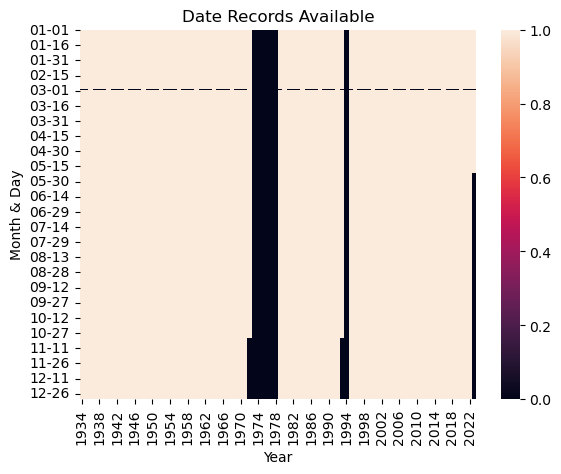

In [33]:
# Generate heatmap to show what years/dates are missing
# I will not be filling these in, but I want to have this image to refer back to.

years = list(map(int, range(1934,2024)))
days = np.sort(weather_df['Month & Day'].unique())

weather_summary = pd.pivot_table(weather_df[weather_df['STATION']=='USW00013988'],index='Month & Day',columns='Year',values='Highest Hourly Temp (Fahrenheit)',aggfunc='mean')

find_missing_dates = pd.DataFrame(index=days,columns=years)

for column in range (len(find_missing_dates.columns)):
    for row in range(len(find_missing_dates.index)):
        if find_missing_dates.index[row] in weather_summary.index and find_missing_dates.columns[column] in weather_summary.columns:
            if not np.isnan(weather_summary[find_missing_dates.columns[column]][find_missing_dates.index[row]]):
                find_missing_dates[find_missing_dates.columns[column]][row] = 1.0
            else:
                find_missing_dates[find_missing_dates.columns[column]][row] = 0.0
        else:

            find_missing_dates[find_missing_dates.columns[column]][row] = 0.0
    
find_missing_dates = find_missing_dates.rename_axis(index='Month & Day',columns='Year')

find_missing_dates = find_missing_dates.astype(float)
plt.title('Date Records Available')
sb.heatmap(find_missing_dates)



## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [34]:
# Remove NKC station.  As determined in Checkpoint 2, the data span is not significant and there is no max and min temperature data.

weather_df = weather_df[weather_df['STATION']=='USW00013988']
weather_df.tail()

,STATION,NAME,DATE,Avg Daily Cloudiness (%),Avg Solar Day Cloudiness (%),Avg Daily Wind Speed (mph),Days in Multiday Precipitation,Fastest Wind Time (HH:MM),Base of Frozen Ground Layer (inches),Top of Frozen Ground Layer (inches),...,Weather Type - Freezing Drizzle,Weather Type - Rain,Weather Type - Freezing Rain,Weather Type - Snow,Weather Type - Ice Fog or Freezing Fog,Year,Month,Day,Month & Day,Year & Month
29965,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2023-05-17,NaN,NaN,4.03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,5,17,05-17,2023-05
29966,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2023-05-18,NaN,NaN,4.47,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,5,18,05-18,2023-05
29967,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2023-05-19,NaN,NaN,4.70,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,5,19,05-19,2023-05
29968,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2023-05-20,NaN,NaN,4.25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,5,20,05-20,2023-05
29969,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2023-05-21,NaN,NaN,3.58,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023,5,21,05-21,2023-05


In [35]:
# Review column information

weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29970 entries, 0 to 29969
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   STATION                                           29970 non-null  object 
 1   NAME                                              29970 non-null  object 
 2   DATE                                              29970 non-null  object 
 3   Avg Daily Cloudiness (%)                          3886 non-null   float64
 4   Avg Solar Day Cloudiness (%)                      3886 non-null   float64
 5   Avg Daily Wind Speed (mph)                        10904 non-null  float64
 6   Days in Multiday Precipitation                    3 non-null      float64
 7   Fastest Wind Time (HH:MM)                         3875 non-null   float64
 8   Base of Frozen Ground Layer (inches)              5 non-null      float64
 9   Top of Frozen Gro

In [36]:
# remove all columns with less than 5% coverage

total_records = len(weather_df.index)

columns_to_delete = []

for column in weather_df.columns:
    if weather_df[column].notnull().sum() < (total_records * 0.05):
        columns_to_delete.append(column)

weather_df.drop(weather_df.loc[:,columns_to_delete], axis=1,inplace=True)

# Review remaining columns
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29970 entries, 0 to 29969
Data columns (total 34 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   STATION                                           29970 non-null  object 
 1   NAME                                              29970 non-null  object 
 2   DATE                                              29970 non-null  object 
 3   Avg Daily Cloudiness (%)                          3886 non-null   float64
 4   Avg Solar Day Cloudiness (%)                      3886 non-null   float64
 5   Avg Daily Wind Speed (mph)                        10904 non-null  float64
 6   Fastest Wind Time (HH:MM)                         3875 non-null   float64
 7   Distance Between River and Gauge Height (inches)  6203 non-null   float64
 8   Peak Gust Time (HH:MM)                            5274 non-null   float64
 9   Precipitation (in

In [37]:
# Remove remaining irrelevant columns

irrelevant_columns = ['Avg Daily Cloudiness (%)',
                      'Avg Solar Day Cloudiness (%)',
                      'Avg Daily Wind Speed (mph)',
                      'Fastest Wind Time (HH:MM)',
                      'Distance Between River and Gauge Height (inches)',
                      'Peak Gust Time (HH:MM)',
                      'Daily % of Possible Sunshine',
                      'Direction of Fastest 2-Minute Wind (degrees)',
                      'Direction of Fastest 5-Minute Wind (degrees)',
                      'Fastest mile wind direction (degrees)',
                      'Fastest 2-minute wind speed (mph)',
                      'Fastest 5-minute wind speed (mph)',
                      'Fastest mile wind speed (mph)',
                      'Weather Type - Fog','Weather Type - Thunder',
                      'Weather Type - Smoke or Haze',
                      'Weather Type - Rain','Weather Type - Snow',
                      'Daily Total Sunshine (minutes)']

weather_df.drop(weather_df.loc[:,irrelevant_columns], axis=1,inplace=True)

weather_df.head()

,STATION,NAME,DATE,Precipitation (inches),Snowfall (inches),Snow Depth (inches),Avg Hourly Temp (Fahrenheit),Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit),Temperature at Observation (Fahrenheit),Year,Month,Day,Month & Day,Year & Month
0,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-01,0.00,0.0,0.0,NaN,26.0,15.0,NaN,1934,1,1,01-01,1934-01
1,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-02,0.00,0.0,0.0,NaN,33.0,25.0,NaN,1934,1,2,01-02,1934-01
2,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-03,0.21,0.0,0.0,NaN,32.0,30.0,NaN,1934,1,3,01-03,1934-01
3,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-04,0.20,0.0,0.0,NaN,34.0,32.0,NaN,1934,1,4,01-04,1934-01
4,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1934-01-05,0.00,0.0,0.0,NaN,36.0,32.0,NaN,1934,1,5,01-05,1934-01


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [38]:
# Create pivot tables with for each of the three key fields
Check_HighTemp = pd.pivot_table(weather_df,index='Year',columns='Month & Day',values='Highest Hourly Temp (Fahrenheit)')
Check_LowTemp = pd.pivot_table(weather_df,index='Year',columns='Month & Day',values='Lowest Hourly Temp (Fahrenheit)')
Check_Precipitation = pd.pivot_table(weather_df,index='Year',columns='Month & Day',values='Precipitation (inches)')

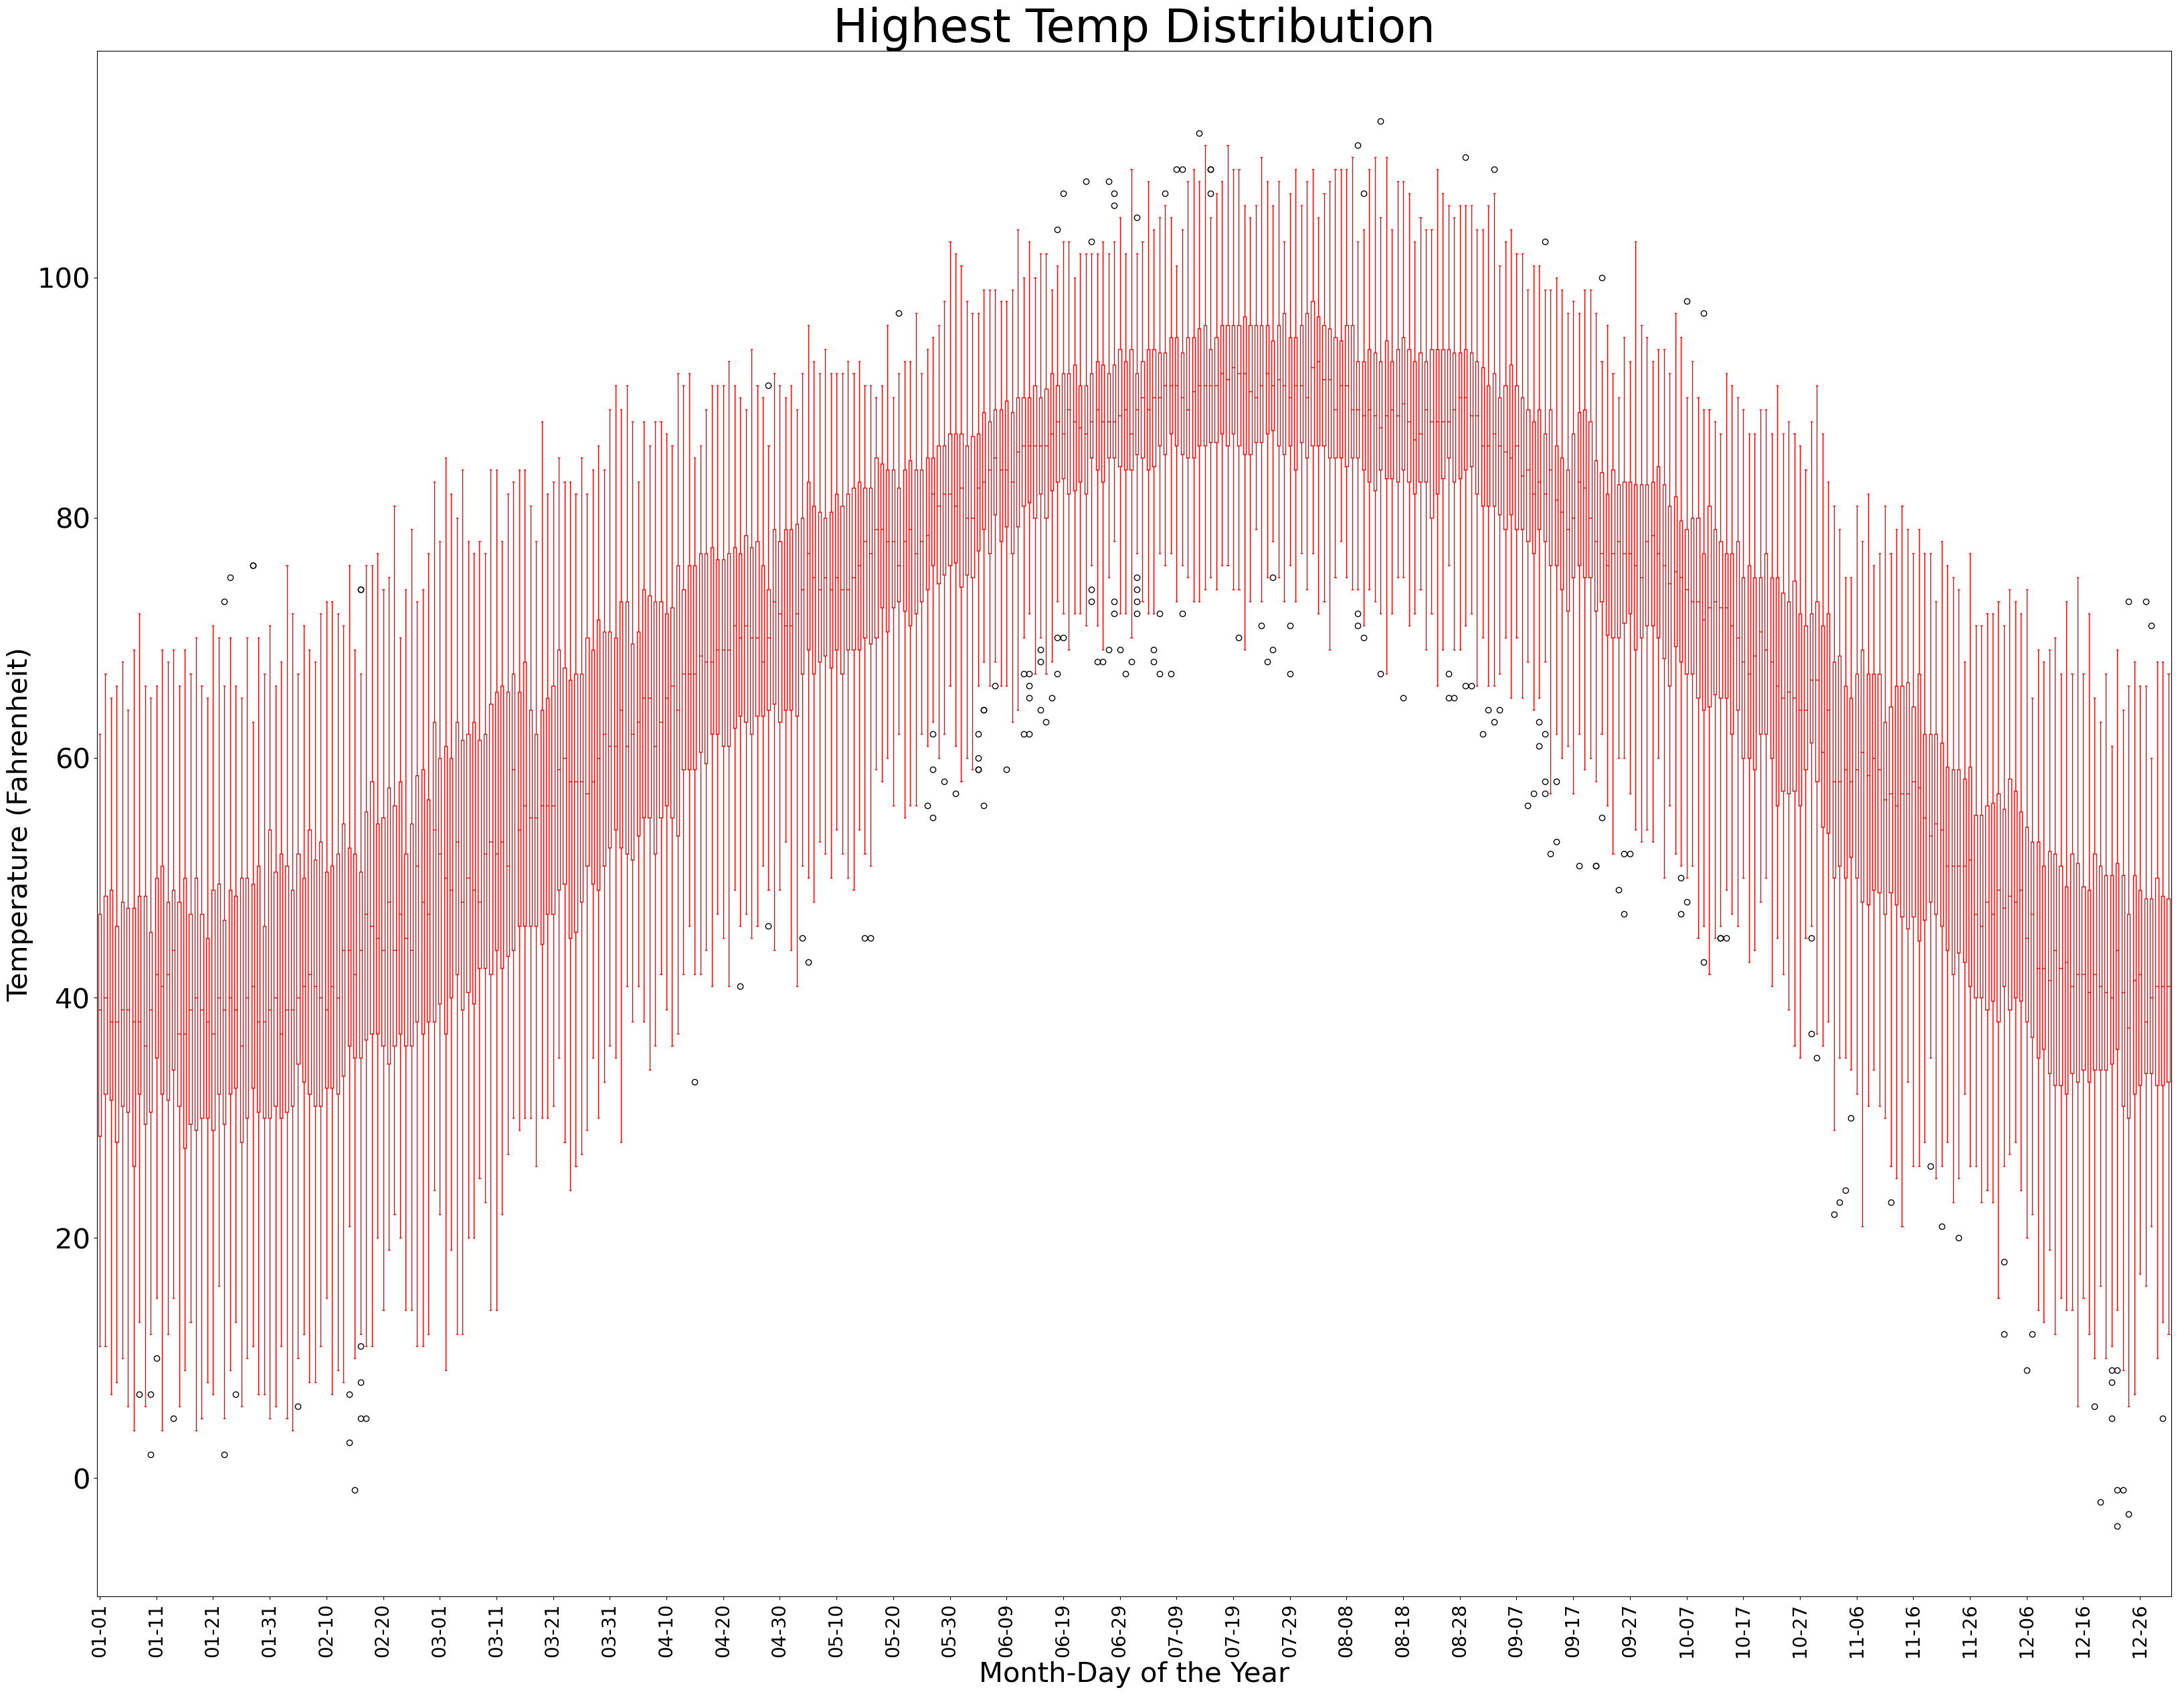

In [39]:
# Create box plot for range of highest temperature for each day of the year
plt.rcParams['figure.figsize'] = (40,30)
Check_HighTemp.plot(kind='box', color = 'r')
plt.title('Highest Temp Distribution',color = 'black',fontsize=50)
plt.xlabel('Month-Day of the Year',color = 'black',fontsize=30)
plt.ylabel('Temperature (Fahrenheit)',color = 'black',fontsize=30)
plt.yticks(fontsize=30)
xticks = plt.gca().xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 10 != 0:
        xticks[i].set_visible(False)
plt.xticks(fontsize=20,rotation='vertical')
plt.show()

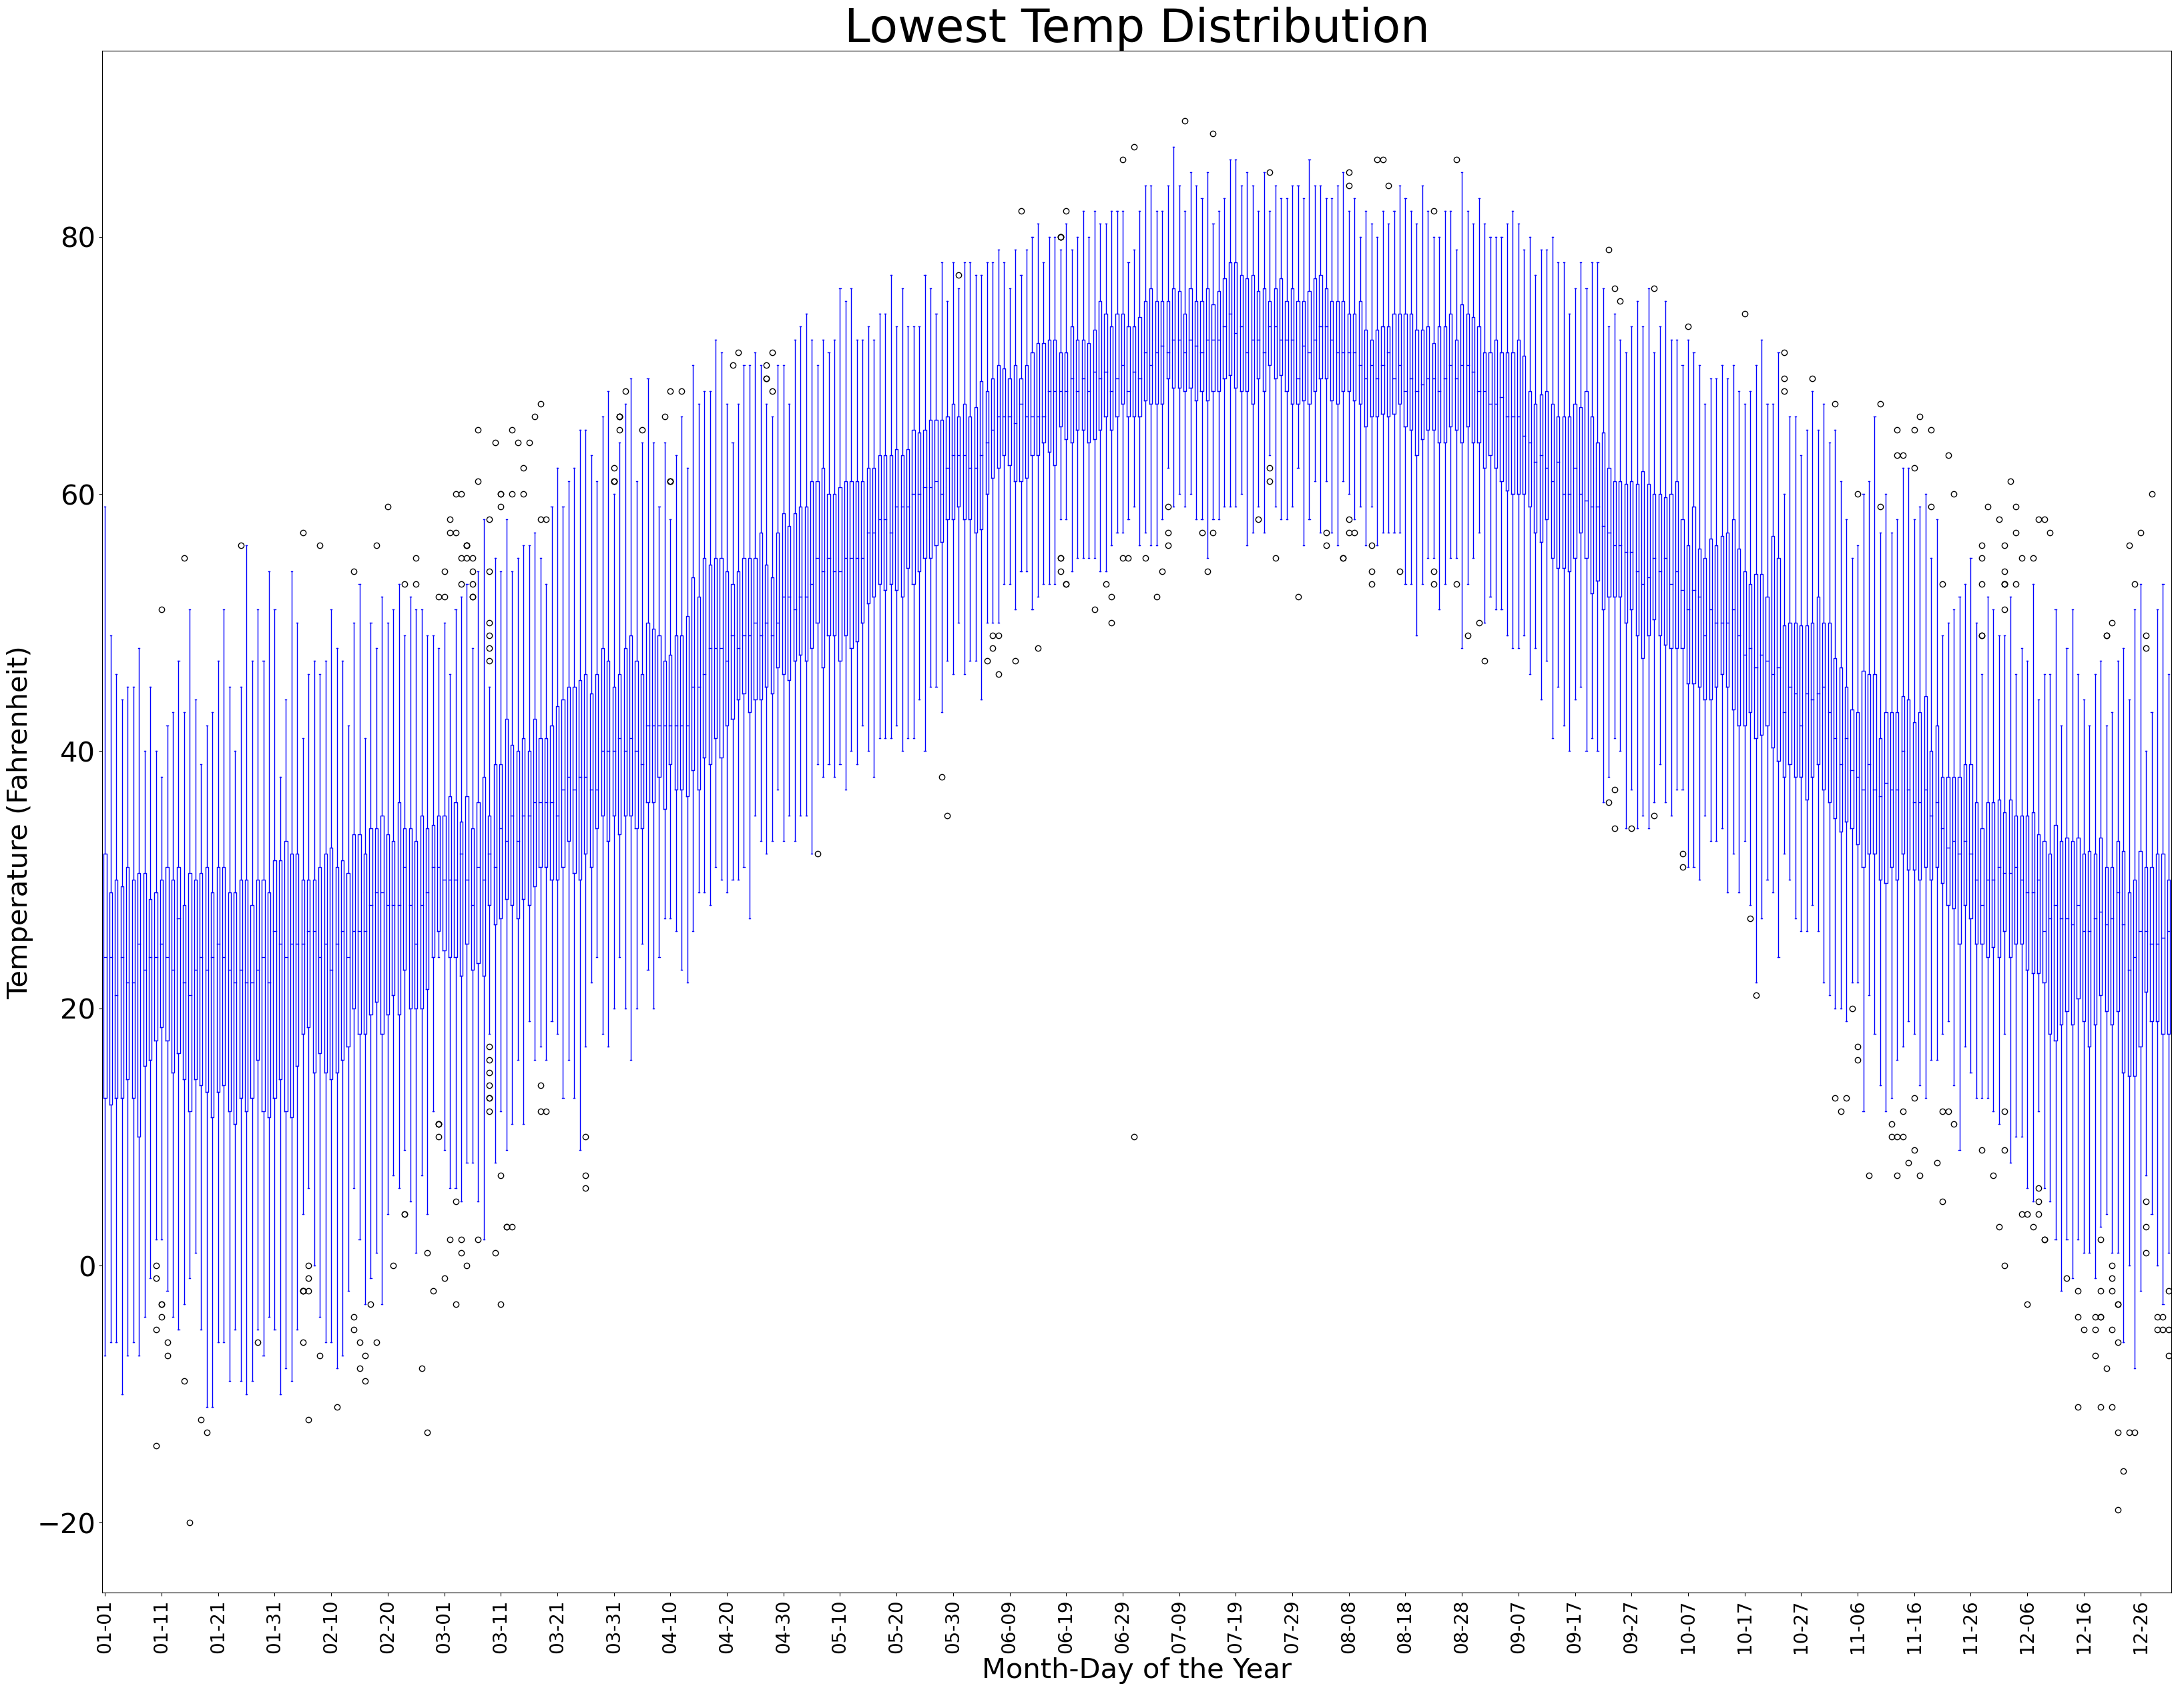

In [40]:
# Create box plot for range of lowest temperature for each day of the year
Check_LowTemp.plot(kind='box', color='b')
plt.title('Lowest Temp Distribution', color = 'black',fontsize=50)
plt.xlabel('Month-Day of the Year',color = 'black',fontsize=30)
plt.ylabel('Temperature (Fahrenheit)',color = 'black',fontsize=30)
plt.yticks(fontsize=30)
xticks = plt.gca().xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 10 != 0:
        xticks[i].set_visible(False)
plt.xticks(fontsize=20,rotation='vertical')
plt.show()

In [41]:
# There is one extreme outlier in the low temp which was also discovered during checkpoint 2.
weather_df[((weather_df['Month']==6) | (weather_df['Month']==7)) & (weather_df['Lowest Hourly Temp (Fahrenheit)'] < 20)]

,STATION,NAME,DATE,Precipitation (inches),Snowfall (inches),Snow Depth (inches),Avg Hourly Temp (Fahrenheit),Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit),Temperature at Observation (Fahrenheit),Year,Month,Day,Month & Day,Year & Month
20514,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1997-07-01,0.8,0.0,0.0,NaN,94.0,10.0,84.0,1997,7,1,07-01,1997-07


In [42]:
# View surrounding records
weather_df.loc[20512:20516,:]

,STATION,NAME,DATE,Precipitation (inches),Snowfall (inches),Snow Depth (inches),Avg Hourly Temp (Fahrenheit),Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit),Temperature at Observation (Fahrenheit),Year,Month,Day,Month & Day,Year & Month
20512,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1997-06-29,0.5,0.0,0.0,NaN,93.0,72.0,75.0,1997,6,29,06-29,1997-06
20513,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1997-06-30,0.0,0.0,0.0,NaN,91.0,70.0,83.0,1997,6,30,06-30,1997-06
20514,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1997-07-01,0.8,0.0,0.0,NaN,94.0,10.0,84.0,1997,7,1,07-01,1997-07
20515,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1997-07-02,0.0,0.0,0.0,NaN,87.0,72.0,72.0,1997,7,2,07-02,1997-07
20516,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1997-07-03,0.0,0.0,0.0,NaN,76.0,64.0,64.0,1997,7,3,07-03,1997-07


In [43]:
# Replace outlier with average of low temp from day before and after.
weather_df['Lowest Hourly Temp (Fahrenheit)'][20514] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][20513] + weather_df['Lowest Hourly Temp (Fahrenheit)'][20515])/2

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1123958282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Lowest Hourly Temp (Fahrenheit)'][20514] = (weather_df['Lowest Hourly Temp (Fahrenheit)'][20513] + weather_df['Lowest Hourly Temp (Fahrenheit)'][20515])/2


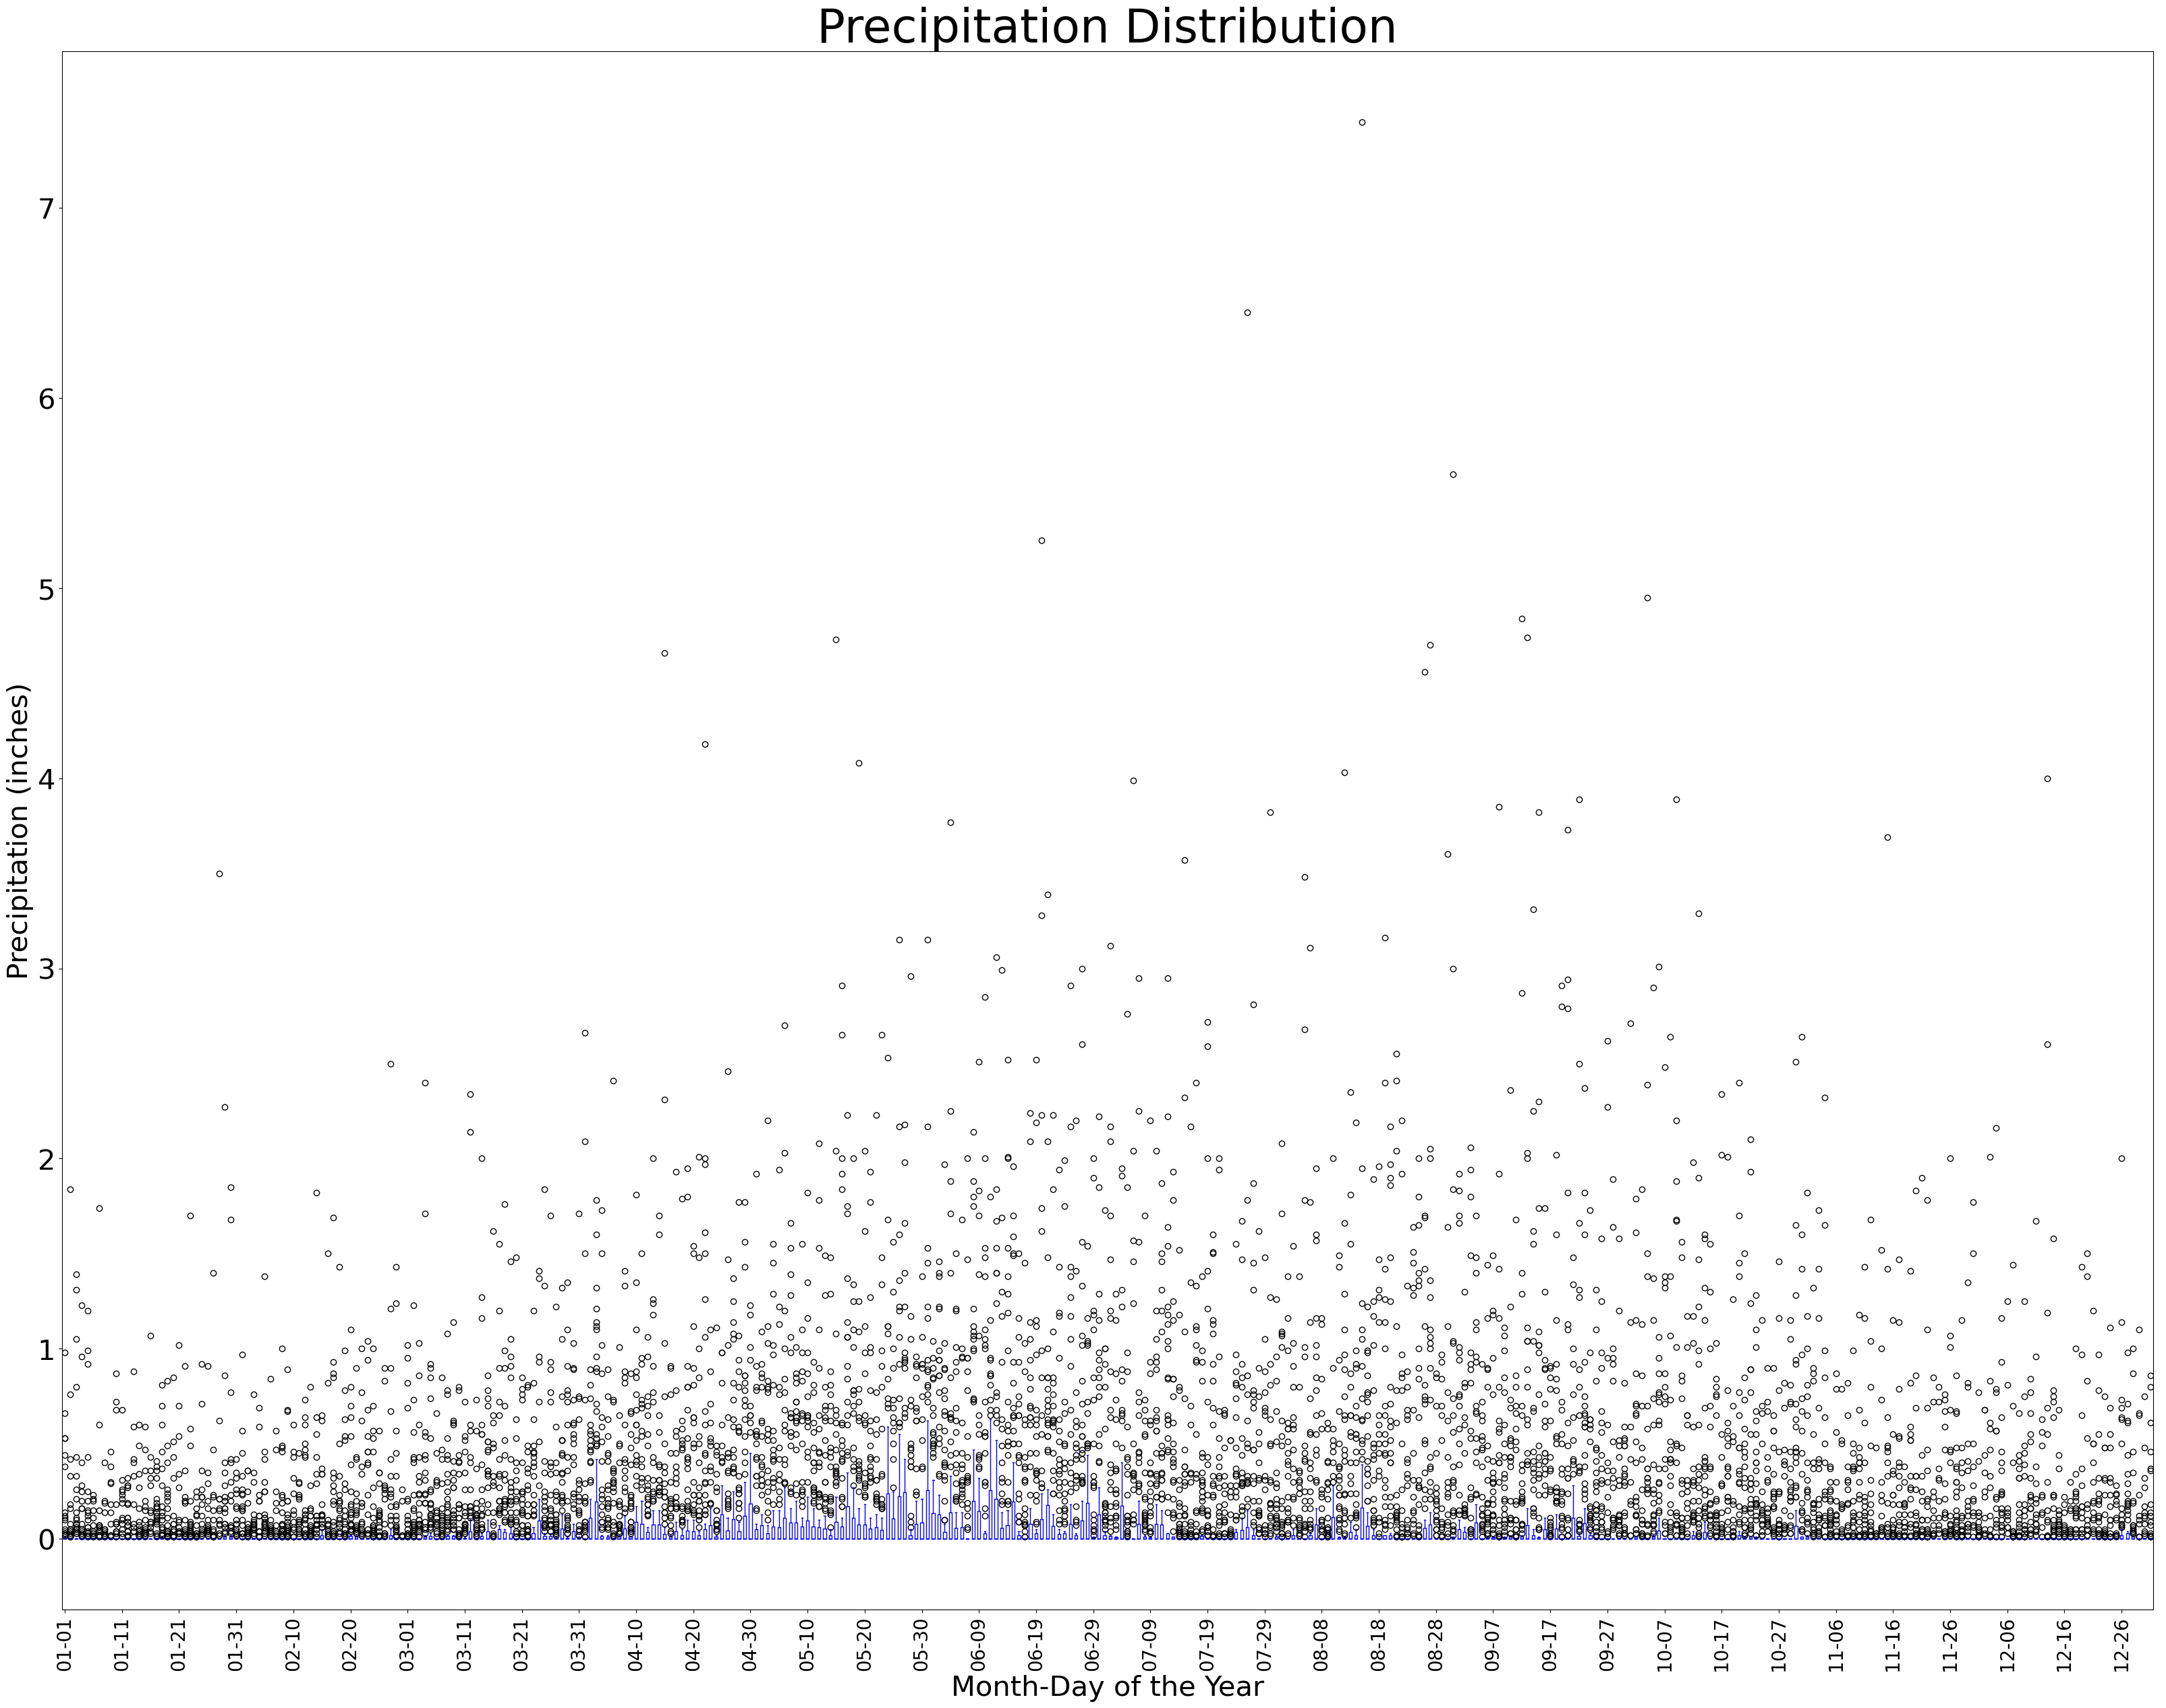

In [44]:
# Create box plot for range of precipitation for each day of the year
Check_Precipitation.plot(kind='box', color='b')
plt.title('Precipitation Distribution', color = 'black',fontsize=50)
plt.xlabel('Month-Day of the Year',color = 'black',fontsize=30)
plt.ylabel('Precipitation (inches)',color = 'black',fontsize=30)
plt.yticks(fontsize=30)
xticks = plt.gca().xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 10 != 0:
        xticks[i].set_visible(False)
plt.xticks(fontsize=20,rotation='vertical')
plt.show()

In [45]:
# 4+ inches of precipitation is pretty unusual but not unheard of.  Checking those records.

weather_df[(weather_df['Precipitation (inches)'] > 4)]

,STATION,NAME,DATE,Precipitation (inches),Snowfall (inches),Snow Depth (inches),Avg Hourly Temp (Fahrenheit),Highest Hourly Temp (Fahrenheit),Lowest Hourly Temp (Fahrenheit),Temperature at Observation (Fahrenheit),Year,Month,Day,Month & Day,Year & Month
1930,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1939-04-15,4.66,0.0,0.0,NaN,68.0,56.0,NaN,1939,4,15,04-15,1939-04
3764,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1944-04-22,4.18,0.0,0.0,NaN,67.0,53.0,NaN,1944,4,22,04-22,1944-04
10117,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1961-09-13,4.74,0.0,0.0,NaN,70.0,50.0,NaN,1961,9,13,09-13,1961-09
13010,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1969-08-15,7.45,0.0,0.0,NaN,77.0,69.0,NaN,1969,8,15,08-15,1969-08
15503,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1982-08-12,4.03,0.0,0.0,NaN,74.0,66.0,NaN,1982,8,12,08-12,1982-08
18336,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1990-05-15,4.73,0.0,NaN,NaN,73.0,60.0,NaN,1990,5,15,05-15,1990-05
20904,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1998-07-26,6.45,0.0,0.0,70.0,75.0,65.0,65.0,1998,7,26,07-26,1998-07
20974,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",1998-10-04,4.95,0.0,0.0,63.0,67.0,55.0,64.0,1998,10,4,10-04,1998-10
21599,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2000-06-20,5.25,0.0,0.0,73.0,80.0,65.0,70.0,2000,6,20,06-20,2000-06
22766,USW00013988,"KANSAS CITY DOWNTOWN AIRPORT, MO US",2003-08-31,5.60,0.0,0.0,65.0,66.0,62.0,NaN,2003,8,31,08-31,2003-08


In [46]:
# weather.gov historical records (https://www.weather.gov/wrh/climate?wfo=eax) confirm 1930, 3764, 10117, 13010 
# weather.gov was close for 15503, 18336, 24605
# weather.gov indicates 1.51 inches for 1998-07-26 in Pleasant Hill
weather_df['Precipitation (inches)'][20904] = 1.51
# weather.gov indicates 2.83 inches for 1998-10-04 in Pleasant Hill
weather_df['Precipitation (inches)'][20974] = 2.83
# weather.gov indicates 2.30 inches for 2000-06-20 in Pleasant Hill
weather_df['Precipitation (inches)'][21599] = 2.30
# weather.gov indicates 2.74 inches for 2003-08-31 in Pleasant Hill
weather_df['Precipitation (inches)'][22766] = 2.74
# weather.gov indicates 1.32 inches for 2004-05-19 in Pleasant Hill
weather_df['Precipitation (inches)'][23028] = 1.32
# weather.gov indicates 1.49 inches for 2004-08-27 in Pleasant Hill
weather_df['Precipitation (inches)'][23128] = 1.49
# weather.gov indicates 1.96 inches for 2016-08-26 in Pleasant Hill
weather_df['Precipitation (inches)'][27510] = 1.96

/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1220295692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Precipitation (inches)'][20904] = 1.51
/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1220295692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['Precipitation (inches)'][20974] = 2.83
/var/folders/n7/v6st_7m50r399qhl3pcqrdmh0000gn/T/ipykernel_15807/1220295692.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [47]:
# Review values of three key fields to ensure consistent decimal points

columns_to_check = ['Precipitation (inches)','Lowest Hourly Temp (Fahrenheit)','Highest Hourly Temp (Fahrenheit)']
for column in columns_to_check:
    print(weather_df[column].value_counts(),'\n')

0.00    22292
0.01      612
0.02      482
0.03      357
0.05      319
        ...  
3.57        1
3.85        1
4.73        1
2.72        1
3.99        1
Name: Precipitation (inches), Length: 290, dtype: int64 

 68.0    669
 66.0    637
 67.0    621
 70.0    616
 65.0    608
        ... 
-20.0      1
-14.0      1
 88.0      1
 89.0      1
 71.5      1
Name: Lowest Hourly Temp (Fahrenheit), Length: 126, dtype: int64 

 85.0     628
 87.0     628
 82.0     624
 86.0     606
 83.0     601
         ... 
-3.0        1
-2.0        1
 112.0      1
 113.0      1
 3.0        1
Name: Highest Hourly Temp (Fahrenheit), Length: 130, dtype: int64 



## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?  
The first three were present.
2. Did the process of cleaning your data give you new insights into your dataset?
Averages of temperature are generally stable, but the distribution of data is quite large.
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?
Will need to consider that there is a large chunk of the 1970s missing from the data.

In [48]:
weather_df.to_csv('WeatherDataCleaned.csv')